In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

2024-03-26 11:45:40.120896: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-26 11:45:49.748072: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv("data/AMD.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [4]:
def create_dataset(data, time_step):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 12
X, Y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [5]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

2024-03-26 11:45:57.320650: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/hrishi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
model.fit(X, Y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0251
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0046
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0040
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0039
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0034
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0038
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0039
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0033
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0040
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0036
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0022
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - lo

In [8]:
future_period = int(len(df) * 0.1)
future_predictions = []
last_window = scaled_data[-time_step:].reshape(1, time_step, 1)

for i in range(future_period):
    prediction = model.predict(last_window)[0][0]
    future_predictions.append(prediction)
    last_window = np.append(last_window[:, :, :], [[[prediction]]], axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━

In [9]:
last_date = df['Date'].iloc[-1]
date_range = pd.date_range(start=last_date, periods=future_period + 1, freq='M')[1:]

future_df = pd.DataFrame({'Date': date_range, 'Close': future_predictions})
future_df.set_index('Date', inplace=True)

combined_df = pd.concat([df, future_df])

/tmp/ipykernel_8372/568191024.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=last_date, periods=future_period + 1, freq='M')[1:]


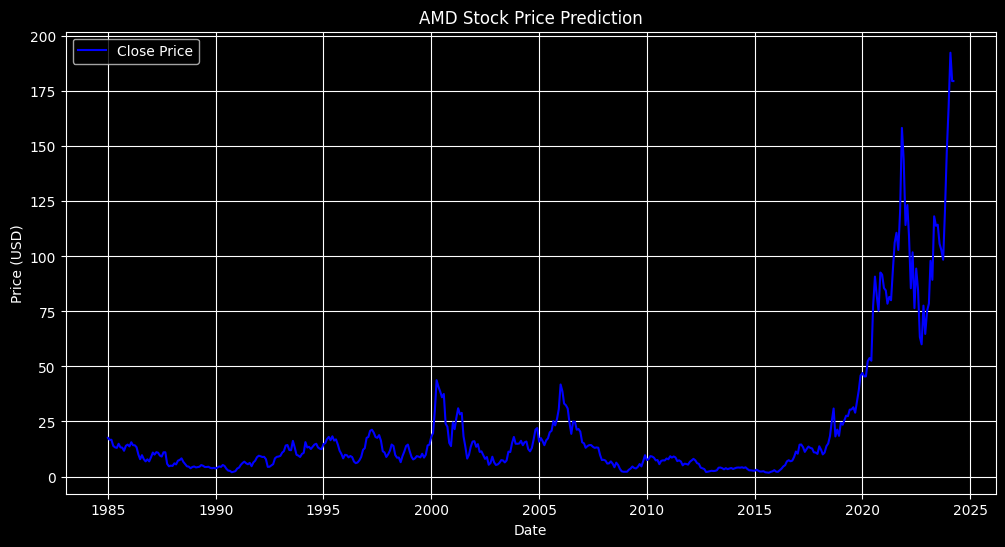

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date'], combined_df['Close'], color='blue', label='Close Price')
plt.title('AMD Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
future_period = 60
future_predictions = []
last_window = scaled_data[-time_step:].reshape(1, time_step, 1)


for i in range(future_period):
    prediction = model.predict(last_window)[0][0]
    future_predictions.append(prediction)
    last_window = np.append(last_window[:, :, :], [[[prediction]]], axis=1)

future_predictions = scaler.inverse_transform(
    np.array(future_predictions).reshape(-1, 1)).flatten()

last_date = df['Date'].iloc[-1]
date_range = pd.date_range(
    start=last_date, periods=future_period + 1, freq='M')[1:]

future_df = pd.DataFrame({'Date': date_range, 'Close': future_predictions})
future_df.set_index('Date', inplace=True)

combined_df = pd.concat([df, future_df])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

/tmp/ipykernel_8372/1231957158.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(


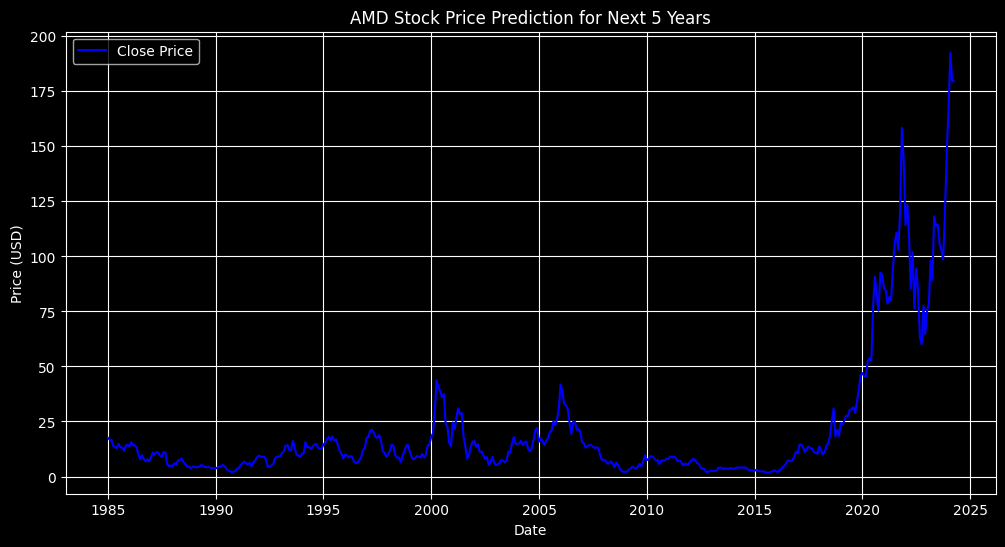

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date'], combined_df['Close'],
         color='blue', label='Close Price')
plt.title('AMD Stock Price Prediction for Next 5 Years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
growth_rate = 0.02
future_predictions_growth = future_predictions * \
    (1 + growth_rate) ** np.arange(1, future_period + 1)

np.random.seed(0)
noise_scale = 0.05
rd_ns = np.random.normal(
    scale=noise_scale, size=len(future_predictions_growth))
future_predictions_trend = future_predictions_growth * (1 + rd_ns)

last_date = df['Date'].iloc[-1]
future_date_range = pd.date_range(
    start=last_date, periods=future_period + 1, freq='M')

future_df = pd.DataFrame(
    {'Date': future_date_range[1:], 'Close': future_predictions_trend})
future_df.set_index('Date', inplace=True)

combined_df = pd.concat([df, future_df])

extended_date_range = pd.date_range(
    start=df['Date'].iloc[0], periods=len(combined_df), freq='M')

/tmp/ipykernel_8372/1494415496.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_date_range = pd.date_range(
/tmp/ipykernel_8372/1494415496.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  extended_date_range = pd.date_range(


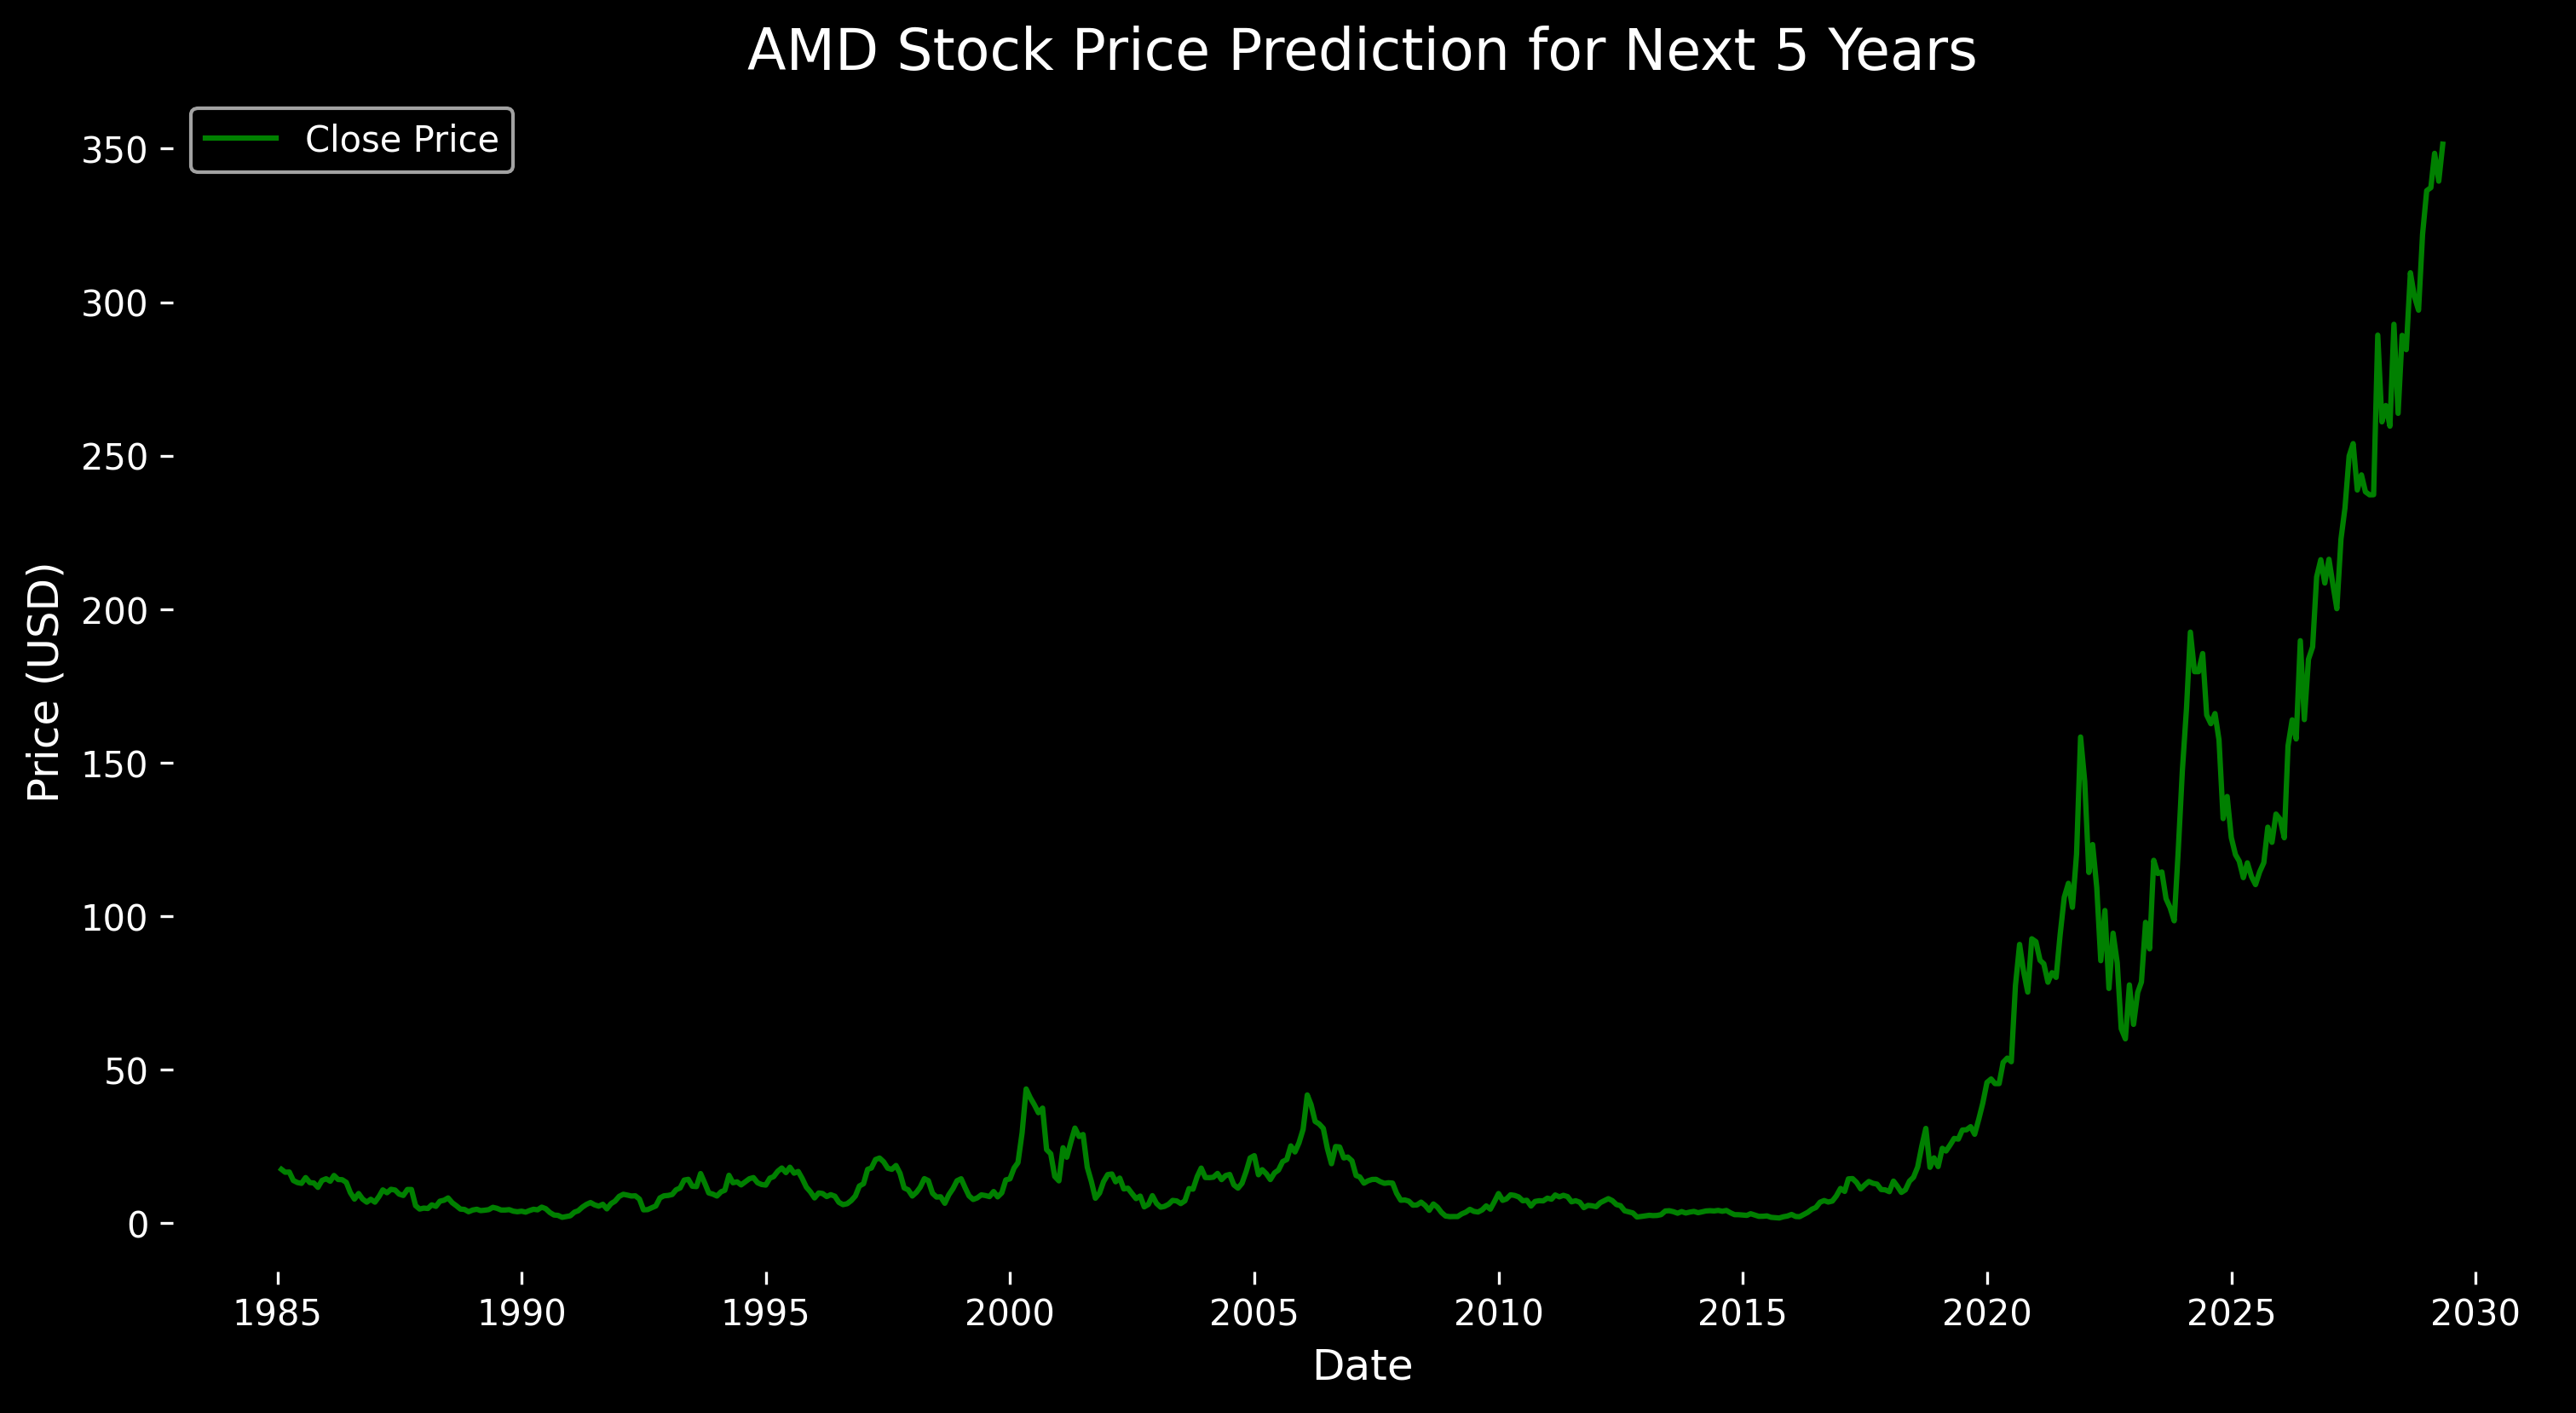

In [15]:
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(extended_date_range, combined_df['Close'], color='green', label='Close Price')
plt.title('AMD Stock Price Prediction for Next 5 Years', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.box(False)
plt.legend(['Close Price'], loc='upper left', fontsize=10)
plt.show()